(labs:cor15)=
# 5 Setting the intensity range

<hr>

## 📌 Commentaires pour les intervenants

* Les étudiants ont du mal de régler vmin et vmax.
  Les accompagner en leur demandant de schématiser l'histogramme de l'image pour qu'ils comprennent que les galaxies peu visibles
  sont dans le noir, et donc qu'il faut diminuer vmax.

<hr>

In [1]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

## Display the image

Load and display the image:

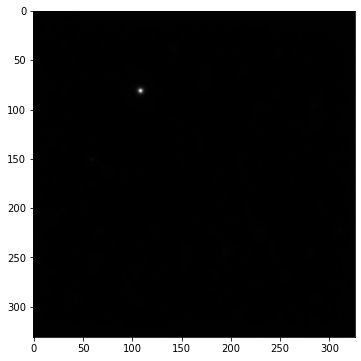

In [2]:
f = io.imread("hdfs.tiff")
plt.figure(figsize=(6,6))
plt.imshow(f, cmap="gray")
plt.show()

This image corresponds to a portion of the sky in the southern hemisphere called the [_Hubble Deep Field South_](http://muse-vlt.eu/science/hdfs-v1-0/). It was acquired by the [MUSE sensor](http://muse-vlt.eu/science/) installed on the VLT in Chile. It is obtained by averaging around 4000 bands of the original image: we speak of a hyperspectral image (source: [Bacon et al., "The MUSE 3D view of the Hubble Deep Field South", _Astronomy & Astrophysics_, 2015](https://www.aanda.org/articles/aa/abs/2015/03/aa25419-14/aa25419-14.html)).

## Sketch the histogram

Although only a small star can be seen, there are many other astronommimcal objects. Since these objects are very distant, they are very faint. In astronomy, as in many other science fields, the pixel intensity is not limited to 256 values. In this case, the intensities lie over the range given below:

In [3]:
print("Mininmal intensity: %d" % f.min())
print("Maximal intensity: %d" % f.max())

Mininmal intensity: 625722
Maximal intensity: 628454834


Here is a sketch of what should be the histogram.
Most of the pixels are very dark hence the peak at the minimum intensities.
In this peak (but not at the minimum value) lie the galaxies.
Thus, the colormap is expected to be somewhere around the red area.

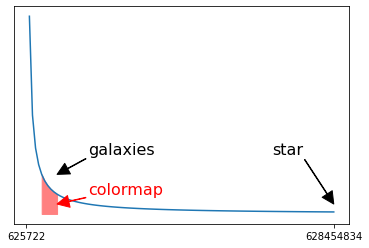

In [4]:
# # Histogram
# plt.figure()
# plt.hist( f.ravel(), bins=100)
# plt.show()

# Sketch of the histogram
fig, ax = plt.subplots()

# Area
x = np.linspace(0.05, 0.1, 10)
plt.fill_between(x, 1/x, color=[1,.5,.5])

# Histogram
x = np.linspace(1e-2, 1, 100)
plt.plot(x, 1/x)

# Axes
plt.xticks([0, 1], [f.min(), f.max()])
plt.yticks([])
ax.annotate('star',     size=16, xy=(1, 5), xytext=(0.8, 30), arrowprops=dict(facecolor='black', width=0.5))
ax.annotate('galaxies', size=16, xy=(0.1, 20), xytext=(0.2, 30), arrowprops=dict(facecolor='black', width=0.5))
ax.annotate('colormap', size=16, xy=(0.1, 5), xytext=(0.2, 10), arrowprops=dict(facecolor='r', edgecolor='r', width=0.5), color='r')
plt.show()


## Choose a better colormap

Therefore, to observe the other objects, we will adjust the colormap so that the gray levels will lie between `vmin` and `vmax`. 
Intensities less than `vmin` will be displayed in black,
intensities greater than `vmax` will be displayed in white,
and intensities in between will be displayed with the different levels or gray.
It's up to you to find these values to get an image like the one below, where other stars and galaxies are clearly visible
(and the brightest star is saturated).

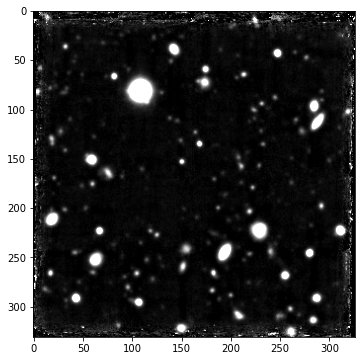

In [5]:
plt.figure(figsize=(6,6))
plt.imshow(f, cmap="gray", vmin=3e6, vmax=4e6)
plt.show()
# NB : ne pas utiliser d'histogramme : ça plante le notebook !

Another possibility is to use colors to increase the dynamics of the intensities observed. The `jet` colormap is used in the example below, with the the same `vmin` and `vmax` as before. We observe a few more objects.

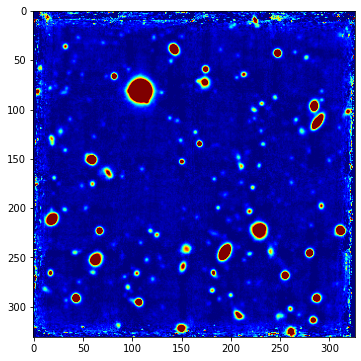

In [6]:
plt.figure(figsize=(6,6))
plt.imshow(f, cmap="jet", vmin=3e6, vmax=4e6)
plt.show()